QUESTION 1 (Fischerfaces and eigenfaces)

In [ ]:
from time import time
import logging
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
#Download the data
lfw_people =fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w=lfw_people.images.shape


In [ ]:
X = lfw_people.data
y = lfw_people.target

n_features = X.shape[1]
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:

pca_trial = PCA (n_components = 1000).fit(X_train)

(1000,)

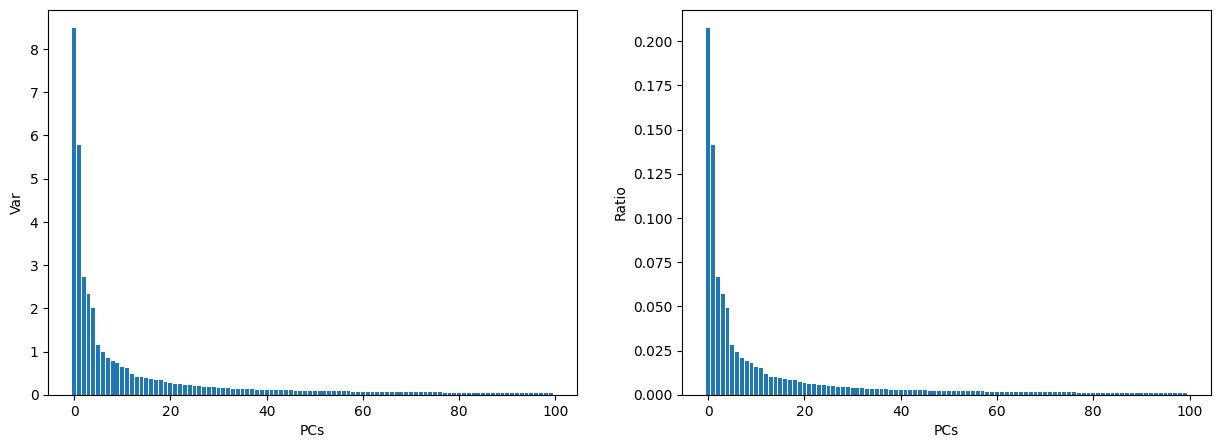

In [ ]:
top_pcs=100
plt.figure( figsize=(15, 5))
plt.subplot(121)
plt.bar(np.arange(top_pcs),pca_trial.explained_variance_[0:top_pcs])
plt.xlabel('PCs')
plt.ylabel('Var')

plt.subplot(122)
plt.bar(np.arange(top_pcs),pca_trial.explained_variance_ratio_[0:top_pcs])
plt.xlabel('PCs')
plt.ylabel('Ratio')

np.shape(pca_trial.explained_variance_)

In [ ]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 60

'''tinker around with various number of components'''

print("Extracting the top %d eignefaces from %d faces" % (n_components, X_train.shape[0]))

#Initiate a time counter (kinda like tic toc)
t0=time()

#Here we take the training data and compute the PCs
pca=PCA(n_components=n_components, whiten=True).fit(X_train)

#Print the time it took to compute
print("Done in %0.3fs" % (time()-t0))



#Reshape the PCs to the image format
eigenfaces =pca.components_.reshape((n_components,h,w))


Extracting the top 60 eignefaces from 1030 faces
Done in 0.333s


In [ ]:
print("Projecting the input data on the eignefaces orthonormal basis")

t0=time()#tic

X_train_pca = pca.transform(X_train) #take the training data and project it to eigenfaces
X_test_pca  = pca.transform(X_test)#take the test data and project it to eigenfaces
print("Done in %0.5fs" % (time()- t0)) #toc

Projecting the input data on the eignefaces orthonormal basis
Done in 0.02678s


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming X_train contains your training data and y_train contains the corresponding labels
lda = LinearDiscriminantAnalysis(n_components=5)
fisherfaces = lda.fit_transform(X,y)
train_lda = lda.fit_transform(X_train,y_train)
test_lda = lda.fit_transform(X_test,y_test)
# X_lda now contains the Fisherface representations of your data


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize the k-NN classifier
k = 3  # You can adjust the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier on the transformed training data
knn_classifier.fit(X_train_pca, y_train)

# Make predictions on the transformed test data
y_pred = knn_classifier.predict(X_test_pca)

# Evaluate the accuracy of the k-NN classifier
accuracyknn = accuracy_score(y_test, y_pred)
print(f"Accuracy of Eigenfaces using k-NN: {accuracyknn * 100:.2f}%")

Accuracy of Eigenfaces using k-NN: 65.89%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize the k-NN classifier
j = 3  # You can adjust the number of neighbors
knn1_classifier = KNeighborsClassifier(n_neighbors=j)

# Train the k-NN classifier on the transformed training data
knn1_classifier.fit(train_lda,y_train)

# Make predictions on the transformed test data
y_pred1 = knn1_classifier.predict(test_lda)

# Evaluate the accuracy of the k-NN classifier
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Fischerfaces using k-NN: {accuracy1 * 100:.2f}%")

Accuracy of Fischerfaces using k-NN: 71.32%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

macro_precision = precision_score(y_test, y_pred,average='macro')
macro_recall = recall_score(y_test, y_pred,average='macro')
macro_f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy of Eigenfaces using knn: {accuracyknn * 100:.2f}%")
print(f"Precision (macro) : {macro_precision:.2f}")
print(f"Recall (macro) : {macro_recall:.2f}")
print(f"F1-Score (macro) : {macro_f1:.2f}")

micro_precision = precision_score(y_test, y_pred,average='micro')
micro_recall = recall_score(y_test, y_pred,average='micro')
micro_f1 = f1_score(y_test, y_pred,average='micro')

print(f"Precision (micro) : {micro_precision:.2f}")
print(f"Recall (micro) : {micro_recall:.2f}")
print(f"F1-Score (micro) : {micro_f1:.2f}")

weighted_precision = precision_score(y_test, y_pred,average='weighted')
weighted_recall = recall_score(y_test, y_pred,average='weighted')
weighted_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Precision (weighted) : {weighted_precision:.2f}")
print(f"Recall (weighted) : {weighted_recall:.2f}")
print(f"F1-Score (weighted) : {weighted_f1:.2f}")

Accuracy of Eigenfaces using knn: 65.89%
Precision (macro) : 0.68
Recall (macro) : 0.56
F1-Score (macro) : 0.57
Precision (micro) : 0.66
Recall (micro) : 0.66
F1-Score (micro) : 0.66
Precision (weighted) : 0.71
Recall (weighted) : 0.66
F1-Score (weighted) : 0.66


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

macro1_precision = precision_score(y_test, y_pred1,average='macro',zero_division=0)
macro1_recall = recall_score(y_test, y_pred1,average='macro',zero_division=0)
macro1_f1 = f1_score(y_test, y_pred1,average='macro',zero_division=0)

print(f"Accuracy of Fischerfaces using k-NN: {accuracy1 * 100:.2f}%")
print(f"Precision (macro) : {macro1_precision:.2f}")
print(f"Recall (macro) : {macro1_recall:.2f}")
print(f"F1-Score (macro) : {macro1_f1:.2f}")

micro1_precision = precision_score(y_test, y_pred1,average='micro',zero_division=0)
micro1_recall = recall_score(y_test, y_pred1,average='micro',zero_division=0)
micro1_f1 = f1_score(y_test, y_pred1,average='micro',zero_division=0)

print(f"Precision (micro) : {micro1_precision:.2f}")
print(f"Recall (micro) : {micro1_recall:.2f}")
print(f"F1-Score (micro) : {micro1_f1:.2f}")

weighted1_precision = precision_score(y_test, y_pred1,average='weighted',zero_division=0)
weighted1_recall = recall_score(y_test, y_pred1,average='weighted',zero_division=0)
weighted1_f1 = f1_score(y_test, y_pred1,average='weighted',zero_division=0)

print(f"Precision (weighted) : {weighted1_precision:.2f}")
print(f"Recall (weighted) : {weighted1_recall:.2f}")
print(f"F1-Score (weighted) : {weighted1_f1:.2f}")

Accuracy of Fischerfaces using k-NN: 71.32%
Precision (macro) : 0.37
Recall (macro) : 0.43
F1-Score (macro) : 0.38
Precision (micro) : 0.71
Recall (micro) : 0.71
F1-Score (micro) : 0.71
Precision (weighted) : 0.58
Recall (weighted) : 0.71
F1-Score (weighted) : 0.63


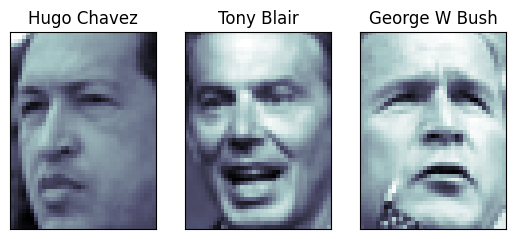

In [ ]:
pl.figure
for i in range(0,3):
  pl.subplot(1,3,i+1)
  pl.imshow(X[i].reshape((h,w)), cmap=pl.cm.bone)
  pl.title(target_names[lfw_people.target[i]])
  pl.xticks(())
  pl.yticks(())

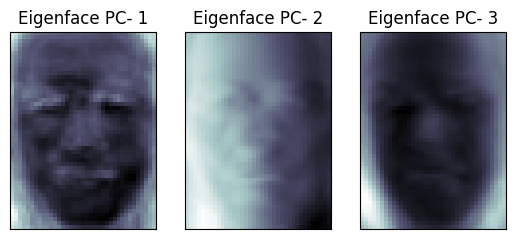

In [ ]:
pl.figure
for i in range(0,3):
  pl.subplot(1,3,i+1)
  pl.imshow(eigenfaces[i], cmap=pl.cm.bone)
  pl.title("Eigenface PC- %d" % (i+1))
  pl.xticks(())
  pl.yticks(())

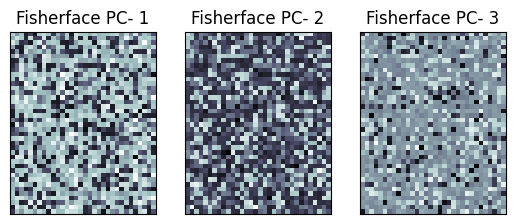

In [ ]:
pl.figure
for i in range(0,3):
  pl.subplot(1,3,i+1)
  pl.imshow(fisherfaces[0:1280,i].reshape(40,32), cmap=pl.cm.bone)
  pl.title("Fisherface PC- %d" % (i+1))
  pl.xticks(())
  pl.yticks(())


QUESTION 2

In [ ]:
import pandas as pd
dataset = pd.read_csv("vehicle-2.csv")
dataset

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [ ]:
df = pd.DataFrame(dataset)
df = dataset.dropna()
df.shape
df_trial = df

In [ ]:
exclude = 'class'
xq2 = df_trial.drop(columns = [exclude])
yq2 = df['class']
xq2.shape


(813, 18)

In [ ]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

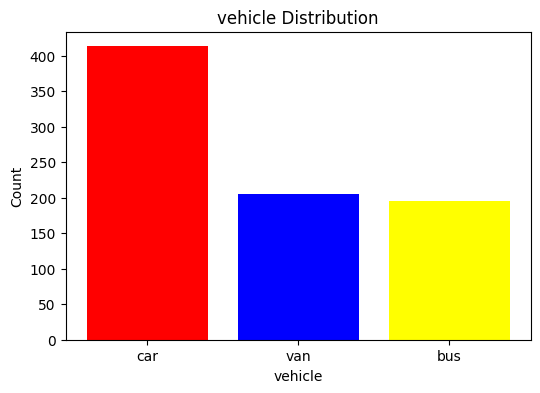

In [ ]:
import matplotlib.pyplot as plt
vehicle_counts = df['class'].value_counts()
vehicles = ['car', 'van','bus']
plt.figure(figsize=(6, 4))
plt.bar(vehicles, vehicle_counts, color=['red', 'blue','yellow'])
plt.title('vehicle Distribution')
plt.xlabel('vehicle')
plt.ylabel('Count')
plt.show()

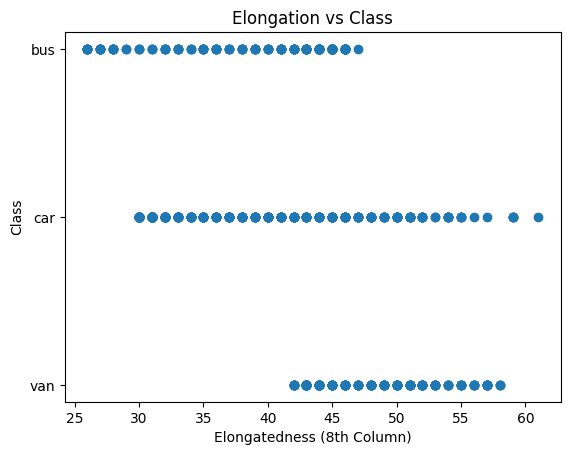

In [ ]:

plt.scatter(df['elongatedness'], df['class'] )
plt.xlabel('Elongatedness (8th Column)')
plt.ylabel('Class')
plt.title('Elongation vs Class')
plt.show()

In [ ]:
xq2_train, xq2_test, yq2_train, yq2_test =train_test_split(xq2,yq2, test_size=0.2, random_state=42)


In [ ]:
list1=[]
list2=[]


for i in range (2,18):
  pca=PCA(n_components=i, whiten=True).fit(xq2_train)
  xq2_train_pca = pca.transform(xq2_train)
  xq2_test_pca  = pca.transform(xq2_test)
  k = 3  # You can adjust the number of neighbors
  knn_classifierq2 = KNeighborsClassifier(n_neighbors=k)

  # Train the k-NN classifier on the transformed training data
  knn_classifierq2.fit(xq2_train_pca, yq2_train)

  # Make predictions on the transformed test data
  yq2_pred = knn_classifierq2.predict(xq2_test_pca)

  # Evaluate the accuracy of the k-NN classifier
  accuracyq2 = accuracy_score(yq2_test, yq2_pred)
  print(f"Accuracy when number of components in pca is {i} : {accuracyq2 * 100:.2f}%")
  list1.append(i)
  list2.append(accuracyq2)

Accuracy when number of components in pca is 2 : 62.58%
Accuracy when number of components in pca is 3 : 66.87%
Accuracy when number of components in pca is 4 : 77.30%
Accuracy when number of components in pca is 5 : 77.30%
Accuracy when number of components in pca is 6 : 85.28%
Accuracy when number of components in pca is 7 : 83.44%
Accuracy when number of components in pca is 8 : 88.96%
Accuracy when number of components in pca is 9 : 93.87%
Accuracy when number of components in pca is 10 : 90.80%
Accuracy when number of components in pca is 11 : 92.02%
Accuracy when number of components in pca is 12 : 95.09%
Accuracy when number of components in pca is 13 : 96.93%
Accuracy when number of components in pca is 14 : 96.32%
Accuracy when number of components in pca is 15 : 96.32%
Accuracy when number of components in pca is 16 : 97.55%
Accuracy when number of components in pca is 17 : 94.48%


In [ ]:
list3=[]
list4=[]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
for i in range (1,3):
  lda = LinearDiscriminantAnalysis(n_components=i)
  trainq2_lda = lda.fit_transform(xq2_train,yq2_train)
  testq2_lda = lda.fit_transform(xq2_test,yq2_test)
  j = 3  # You can adjust the number of neighbors
  knn1q2_classifier = KNeighborsClassifier(n_neighbors=j)

  # Train the k-NN classifier on the transformed training data
  knn1q2_classifier.fit(trainq2_lda,yq2_train)

  # Make predictions on the transformed test data
  yq2_pred1 = knn1q2_classifier.predict(testq2_lda)

  # Evaluate the accuracy of the k-NN classifier
  accuracy1q2 = accuracy_score(yq2_test, yq2_pred1)
  print(f"Accuracy when number of components in lda is {i}: {accuracy1q2 * 100:.2f}%")
  list3.append(i)
  list4.append(accuracy1q2)

Accuracy when number of components in lda is 1: 66.26%
Accuracy when number of components in lda is 2: 76.69%


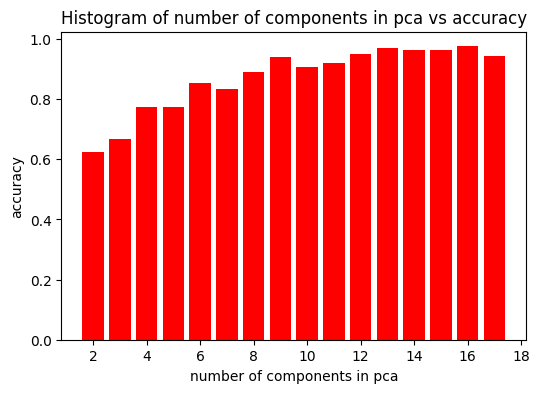

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(list1 ,list2,color='red')
plt.title('Histogram of number of components in pca vs accuracy')
plt.xlabel('number of components in pca')
plt.ylabel('accuracy')
plt.show()

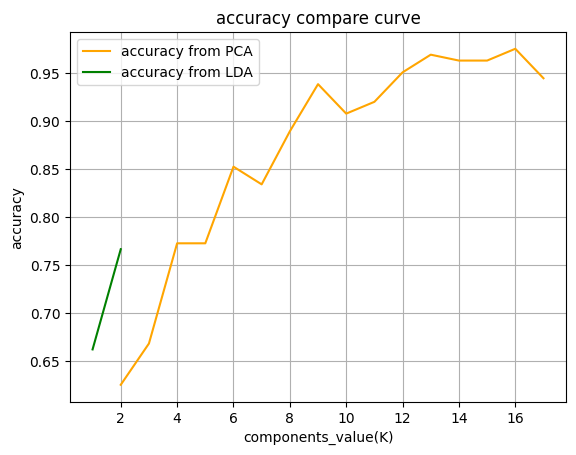

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list1,list2,color = 'orange',label = "accuracy from PCA")
plt.plot(list3,list4,color = 'green',label = "accuracy from LDA")
plt.xlabel("components_value(K)")
plt.ylabel("accuracy")
plt.title("accuracy compare curve")
plt.legend()
plt.grid()
plt.show()